In [1]:
pytest_dir = 'c:\\pytest\\'
data_dir = 'c:\\pytest\\data\\'

In [2]:
%pip install gensim==4.2.0

In [3]:
%pip install nltk

In [4]:
with open(pytest_dir+'wiki_test.txt','r',encoding='utf-8') as f:
    data=f.read()

In [5]:
import rhinoMorph
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
sent_data = sent_tokenize(data)
rn = rhinoMorph.startRhino()
print('type:', type(sent_data))
print('length:', len(sent_data))
print('sentencesample:', sent_data[:5])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\광주인공지능사관학교\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!
type: <class 'list'>
length: 11977
sentencesample: ['<doc id="5" url="https://ko.wikipedia.org/wiki?curid=5" title="지미 카터">\n지미 카터\n\n제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.', '지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.', '조지아 공과대학교를 졸업하였다.', '그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다.', '1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다.']


In [6]:
import os
if not os.path.exists(data_dir+'word2vec'):
    os.mkdir(data_dir+'word2vec')
    print('The word2vec directory is created.')

In [7]:
from tqdm import tqdm
with open(data_dir+'word2vec\\wiki_test_morphed.txt','w',encoding='utf-8') as f:
    for data_each in tqdm(sent_data):
        morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each, pos=['NNG','NNP','VV','VA','XR','IC','MM','MAG', 'MAJ'],xrVv=True,eomi=True)
        joined_data_each = ' '.join(morphed_data_each)
        if joined_data_each:
            f.write(joined_data_each+'\n')
            

100%|██████████| 11977/11977 [00:25<00:00, 464.89it/s] 


In [8]:
def read_data(filename, encoding='utf-8'):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split(' ') for line in f.read().splitlines()]
    return data

data = read_data(data_dir+"word2vec/wiki_test_morphed.txt", 'utf-8')
print(len(data))
print(type(data))
print(data[:3])


11972
<class 'list'>
[['URL', '미', '카터', '미', '카터', '제임스', '얼다', '미', '카터', '주니어', '민주당', '출신', '미국', '대통령'], ['미', '카터', '조지아', '섬터', '카운티', '마을', '태어나다'], ['조지아', '공과대학', '교', '졸업하다']]


In [9]:
embedding_dim= 200 

In [10]:
from gensim.models import Word2Vec
os.chdir(data_dir+'word2vec/')

model = Word2Vec(sentences=data, vector_size=embedding_dim, window=10, min_count=5, workers=4, sg=1) # sg=1 skip gram
model.save('embedding_window10_mincnt5_skipgram_200dim.model')
print('Completed.')


Completed.


In [11]:
words=list(model.wv.index_to_key)
with open('embedding_window10_mincnt5_skipgram.txt','w') as f:
    for word in tqdm(words):
        data=model.wv[word].tolist()
        # print('data_pre:',data)
        
        data.insert(0,word)
        # print('data_after:',data)

        for item in data:
            f.write("%s"%item)
        f.write("\n")

100%|██████████| 10645/10645 [00:02<00:00, 3797.64it/s]


In [12]:
model = Word2Vec.load('embedding_window10_mincnt5_skipgram_200dim.model')
print('---유사단어출력---')
similarWords= model.wv.most_similar(positive=['행복', '웃음', '밝다', '기쁨'], topn=5)
print(similarWords)

word = []
for similarWord in similarWords:
    word.append(similarWord[0])
print(word)

---유사단어출력---
[('고뇌', 0.9841544032096863), ('맴돌다', 0.9818617701530457), ('감동', 0.9799048900604248), ('따뜻하다', 0.97882080078125), ('애꾸눈', 0.9781272411346436)]
['고뇌', '맴돌다', '감동', '따뜻하다', '애꾸눈']


In [13]:
print('---두단어의유사도계산---')
print('한국과일본:',model.wv.similarity('한국','일본'))
print('한국과미국:',model.wv.similarity('한국','미국'))
print('한국과중국:',model.wv.similarity('한국','중국'))


---두단어의유사도계산---
한국과일본: 0.576621
한국과미국: 0.69049615
한국과중국: 0.6955282


In [14]:
model = Word2Vec.load('embedding_window10_mincnt5_skipgram_big.model')
print('---유사단어출력---')
similarWords= model.wv.most_similar(positive=['행복', '웃음', '밝다', '기쁨'], topn=5)
print(similarWords)

word = []
for similarWord in similarWords:
    word.append(similarWord[0])
print(word)

---유사단어출력---
[('행복하다', 0.7607556581497192), ('기쁘다', 0.7480964064598083), ('즐겁다', 0.7307630181312561), ('흐뭇하다', 0.7170217633247375), ('즐거움', 0.7020072340965271)]
['행복하다', '기쁘다', '즐겁다', '흐뭇하다', '즐거움']


In [15]:
print('---두단어의유사도계산---')
print('한국과일본:',model.wv.similarity('한국','일본'))
print('한국과미국:',model.wv.similarity('한국','미국'))
print('한국과중국:',model.wv.similarity('한국','중국'))


---두단어의유사도계산---
한국과일본: 0.7467086
한국과미국: 0.68534184
한국과중국: 0.5778186


In [16]:
def read_data(filename, encoding='utf-8'):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split(' ') for line in f.read().splitlines()]
    return data

data = read_data(data_dir+"word2vec\\wiki_test_morphed.txt", 'utf-8')
print(len(data))
print(type(data))
print(data[:3])


11972
<class 'list'>
[['URL', '미', '카터', '미', '카터', '제임스', '얼다', '미', '카터', '주니어', '민주당', '출신', '미국', '대통령'], ['미', '카터', '조지아', '섬터', '카운티', '마을', '태어나다'], ['조지아', '공과대학', '교', '졸업하다']]


In [17]:
from gensim.models import FastText
os.chdir(data_dir+'fasttext\\')
model = FastText(sentences=data, vector_size=embedding_dim,
                 window=10, min_count=2, workers=4)
model.save('embedding_window10_mincnt5_fasttext.model')
print('completed')


completed


In [18]:
model = Word2Vec.load('embedding_window10_mincnt5_fasttext.model')
print('---유사단어출력---')
similarWords= model.wv.most_similar(positive=['행복', '웃음', '밝다', '기쁨'], topn=5)
print(similarWords)

word = []
for similarWord in similarWords:
    word.append(similarWord[0])
print(word)

---유사단어출력---
[('내비치다', 0.9997389912605286), ('일깨우다', 0.9997148513793945), ('고치다', 0.9997113943099976), ('떨치다', 0.9997028112411499), ('놓치다', 0.999691367149353)]
['내비치다', '일깨우다', '고치다', '떨치다', '놓치다']


In [19]:
print('---두단어의유사도계산---')
print('한국과일본:',model.wv.similarity('한국','일본'))
print('한국과미국:',model.wv.similarity('한국','미국'))
print('한국과중국:',model.wv.similarity('한국','중국'))


---두단어의유사도계산---
한국과일본: 0.98685646
한국과미국: 0.93562806
한국과중국: 0.9895979


In [20]:
from gensim.models import KeyedVectors
os.chdir(data_dir+'fasttext\\model\\')
model=KeyedVectors.load_word2vec_format('wiki.ko.vec')

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: 'c:\\pytest\\data\\fasttext/model/'

In [21]:
print('---유사단어출력---')
similarWords= model.wv.most_similar(positive=['행복', '웃음', '밝다', '기쁨'], topn=5)
print(similarWords)

word = []
for similarWord in similarWords:
    word.append(similarWord[0])
print(word)

---유사단어출력---
[('내비치다', 0.9997389912605286), ('일깨우다', 0.9997148513793945), ('고치다', 0.9997113943099976), ('떨치다', 0.9997028112411499), ('놓치다', 0.999691367149353)]
['내비치다', '일깨우다', '고치다', '떨치다', '놓치다']


In [22]:
print('---두단어의유사도계산---')
print('한국과일본:',model.wv.similarity('한국','일본'))
print('한국과미국:',model.wv.similarity('한국','미국'))
print('한국과중국:',model.wv.similarity('한국','중국'))


---두단어의유사도계산---
한국과일본: 0.98685646
한국과미국: 0.93562806
한국과중국: 0.9895979


In [23]:
with open('c:\\pytest\\ratings.txt','r',encoding='cp949') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
from tqdm import tqdm
import rhinoMorph
rn = rhinoMorph.startRhino()
morphed_data = ''
for data_each in tqdm(data):
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1], pos=['NNG','NNP','VV','VA','XR','IC','MM','MAG', 'MAJ'],xrVv=True,eomi=True)
    joined_data_each = ' '.join(morphed_data_each)
    if joined_data_each:
        morphed_data += data_each[0]+'\t'+joined_data_each+'\t'+data_each[2]+'\n'

with open('c:\\pytest\\ratings_morphed.txt','w',encoding='cp949') as f:
    f.write(morphed_data)
            

filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


100%|██████████| 200001/200001 [02:08<00:00, 1558.27it/s]


In [24]:
with open('c:\\pytest\\ratings_morphed.txt','r',encoding='cp949') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
print(type(data))
print(len(data))
print(len(data[0]))
print(data[0])

<class 'list'>
197560
3
['8112052', '어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ', '1']


In [25]:
import random
import math
import numpy as np
random.shuffle(data)
part_num= math.floor(len(data) * 1/3)
data = data[:part_num]
print(len(data))

65853


In [26]:
from sklearn.model_selection import train_test_split
data_text = [line[1] for line in data]
data_senti = [line[2] for line in data]

train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(
    data_text, data_senti, stratify=data_senti)


In [27]:
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print('train_data_senti_freq:', train_data_senti_freq)
test_data_senti_freq = Counter(test_data_senti)
print('test_data_senti_freq:', test_data_senti_freq)


train_data_senti_freq: Counter({'0': 24863, '1': 24526})
test_data_senti_freq: Counter({'0': 8288, '1': 8176})


In [28]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np
import math
max_words = 10000
maxlen = 20
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index


In [29]:
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
# print('word_index: ', word_index)


전체에서 23691개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>


In [30]:
data = tokenizer.texts_to_sequences(train_data_text)
print('data 0:', data[0])
print('texts 0:', train_data_text[0])


data 0: [49, 6246, 18, 4265, 1394, 39, 157, 4, 282, 8, 7, 323, 8, 755, 331, 16, 42, 77, 4, 284, 46, 3510, 210, 60, 232, 2600, 4, 26, 1714, 3, 26, 3304, 500]
texts 0: 처음 등록하다 평점 일정 강렬하다 말 필요 없다 시나리오 너무 좋다 캐스팅 너무 완벽하다 몰입도 최고 재미없다 장면 없다 공감 가다 독백 대사 많다 고 흠잡다 없다 드라마 여태 보다 드라마 당연 위


In [31]:
data = pad_sequences(data, maxlen=maxlen)
print('data:', data)
print('data 0:', data[0])
print('data 0의길이:', len(data[0]))


data: [[ 755  331   16 ...   26 3304  500]
 [   0    0    0 ...   80 1755    1]
 [   0    0    0 ... 2851  193  118]
 ...
 [   0    0    0 ... 1496  353 1062]
 [   0    0    0 ...   63 2017   10]
 [   0    0    0 ... 6339    2 2183]]
data 0: [ 755  331   16   42   77    4  284   46 3510  210   60  232 2600    4
   26 1714    3   26 3304  500]
data 0의길이: 20


In [32]:
print(type(train_data_text))
print(type(data))
print(data.shape)


<class 'list'>
<class 'numpy.ndarray'>
(49389, 20)


In [33]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# data = to_one_hot(data, dimension=max_words)
labels = np.asarray(train_data_senti).astype('float32')


In [34]:
print(type(train_data_text))
print(type(data))
print(data.shape)
print('데이터텐서의차원:', data.ndim)
print('레이블텐서의차원:', labels.ndim)
print('데이터텐서의크기:', data.shape)
print('레이블텐서의크기:', labels.shape)


<class 'list'>
<class 'numpy.ndarray'>
(49389, 20)
데이터텐서의차원: 2
레이블텐서의차원: 1
데이터텐서의크기: (49389, 20)
레이블텐서의크기: (49389,)


In [35]:
validation_ratio = 0.3
validation_len = math.floor(len(train_data_text) * validation_ratio)
x_train = data[validation_len:]
y_train = labels[validation_len:]
x_val = data[:validation_len]
y_val = labels[:validation_len]


In [36]:
embeddings_index = {}
f = open(os.path.join(data_dir+'word2vec',
         'embedding_window10_mincnt5_skipgram_big.txt'), encoding='cp949')
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:], dtype='float32')
    embeddings_index[word]=coefs
f.close()
print("%s개의 단어 벡터를 찾았습니다."%len(embeddings_index))

155530개의 단어 벡터를 찾았습니다.


In [37]:
embedding_matrix= np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector= embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [38]:
class_number= 1
epochs = 5
batch_size= 32
embedding_dim= 200
model_name= 'text_binary_model.h5'
tokenizer_name= 'text_binary_tokenizer.pickle'

In [40]:
from keras import models
from keras import layers
model = models.Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())

model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=class_number, activation='sigmoid'))


In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 200)           2000000   
                                                                 
 flatten_1 (Flatten)         (None, 4000)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                256064    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,258,177
Trainable params: 2,258,177
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [43]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)

Epoch 1/5
1081/1081 [==============================] - 23s 19ms/step - loss: 0.4453 - acc: 0.7871 - val_loss: 0.4057 - val_acc: 0.8163
Epoch 2/5
1081/1081 [==============================] - 20s 18ms/step - loss: 0.3317 - acc: 0.8621 - val_loss: 0.4180 - val_acc: 0.8109
Epoch 3/5
1081/1081 [==============================] - 20s 18ms/step - loss: 0.2490 - acc: 0.9006 - val_loss: 0.4918 - val_acc: 0.8045
Epoch 4/5
1081/1081 [==============================] - 20s 18ms/step - loss: 0.1944 - acc: 0.9239 - val_loss: 0.5803 - val_acc: 0.7839
Epoch 5/5
1081/1081 [==============================] - 20s 18ms/step - loss: 0.1577 - acc: 0.9408 - val_loss: 0.7792 - val_acc: 0.7562


In [46]:
# 8 ~ 30
# 소문자, 숫자, 특수문자 a-z 0-9 
# 3번 연속 문자 금지
# 몇번수정해야할지출력

import re
passwd=input()
result=True
if not 8<=len(passwd)<=30:
    result=False
if not re.findall('[a-z]', passwd):
    result=False
if not re.findall('[0-9]', passwd):
    result=False
if not re.findall('[`~!@#$%^&*(),<.>/?]+', passwd):
    result=False

result

False

In [49]:
passwd="aa"
s=re.search(r"(\w)\1\1\1", passwd)
s

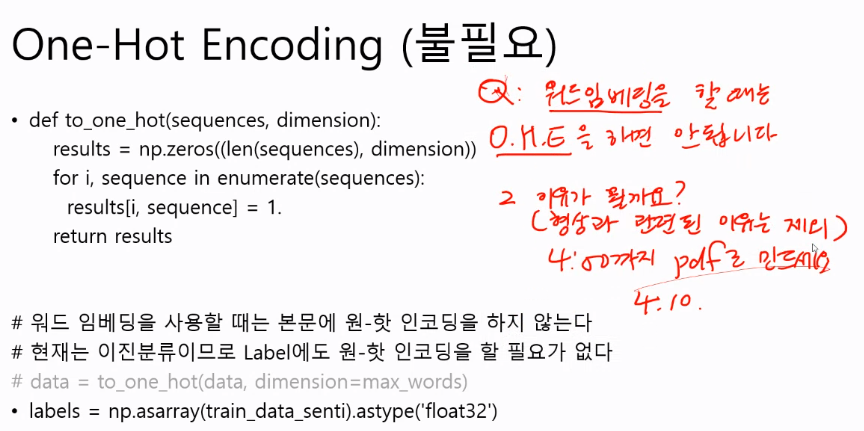

In [ ]:
# 원핫인코딩은 0과 하나의 1로 이루어진 matrix인데, 이것으로는 단어간 유사도를 표현할 수 없다.
# 각 단어의 유사도를 기록하려면 여러 칸이 필요한데 원핫인코딩을 하면 1개 빼고 모든 정보가 소실된다.